In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/ObesityDataSet.csv'
df = pd.read_csv(file_path)

In [ ]:
print("5 Baris Pertama Dataset:")
print(df.head())

5 Baris Pertama Dataset:
  Age  Gender Height Weight        CALC FAVC FCVC NCP  SCC SMOKE CH2O  \
0  21  Female   1.62     64          no   no    2   3   no    no    2   
1  21  Female   1.52     56   Sometimes   no    3   3  yes   yes    3   
2  23    Male    1.8     77  Frequently   no    2   3   no    no    2   
3  27    Male    1.8     87  Frequently   no    3   3   no    no    2   
4  22    Male   1.78   89.8   Sometimes   no    2   1   no    no    2   

  family_history_with_overweight FAF TUE       CAEC                 MTRANS  \
0                            yes   0   1  Sometimes  Public_Transportation   
1                            yes   3   0  Sometimes  Public_Transportation   
2                            yes   2   1  Sometimes  Public_Transportation   
3                             no   2   0  Sometimes                Walking   
4                             no   0   0  Sometimes  Public_Transportation   

            NObeyesdad  
0        Normal_Weight  
1        Normal_W

In [ ]:
print("\nJumlah Baris dan Kolom:", df.shape)
print("\nInformasi Dataset:")
print(df.info())


Jumlah Baris dan Kolom: (2111, 17)

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   obje

In [ ]:
print("\nDeskripsi Data:")
print(df.describe(include='all'))


Deskripsi Data:
         Age Gender Height Weight       CALC  FAVC  FCVC   NCP   SCC SMOKE  \
count   2097   2102   2099   2100       2106  2100  2103  2099  2101  2106   
unique  1394      3   1562   1518          5     3   808   637     3     3   
top       18   Male    1.7     80  Sometimes   yes     3     3    no    no   
freq     124   1056     58     58       1386  1844   647  1183  1997  2054   

        CH2O family_history_with_overweight   FAF   TUE       CAEC  \
count   2105                           2098  2103  2102       2100   
unique  1263                              3  1186  1130          5   
top        2                            yes     0     0  Sometimes   
freq     441                           1705   404   552       1747   

                       MTRANS      NObeyesdad  
count                    2105            2111  
unique                      6               7  
top     Public_Transportation  Obesity_Type_I  
freq                     1572             351  


In [ ]:
kolom_numerik_potensial = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for kolom in kolom_numerik_potensial:
    if kolom in df.columns:
        try:
            df[kolom] = pd.to_numeric(df[kolom], errors='coerce')  # Ubah ke numerik, NaN untuk nilai tak valid
            print(f"Kolom {kolom} berhasil dikonversi ke numerik.")
        except:
            print(f"Kolom {kolom} tidak dapat dikonversi ke numerik.")

Kolom Age berhasil dikonversi ke numerik.
Kolom Height berhasil dikonversi ke numerik.
Kolom Weight berhasil dikonversi ke numerik.
Kolom FCVC berhasil dikonversi ke numerik.
Kolom NCP berhasil dikonversi ke numerik.
Kolom CH2O berhasil dikonversi ke numerik.
Kolom FAF berhasil dikonversi ke numerik.
Kolom TUE berhasil dikonversi ke numerik.


In [ ]:
kolom_numerik = df.select_dtypes(include=['float64', 'int64']).columns

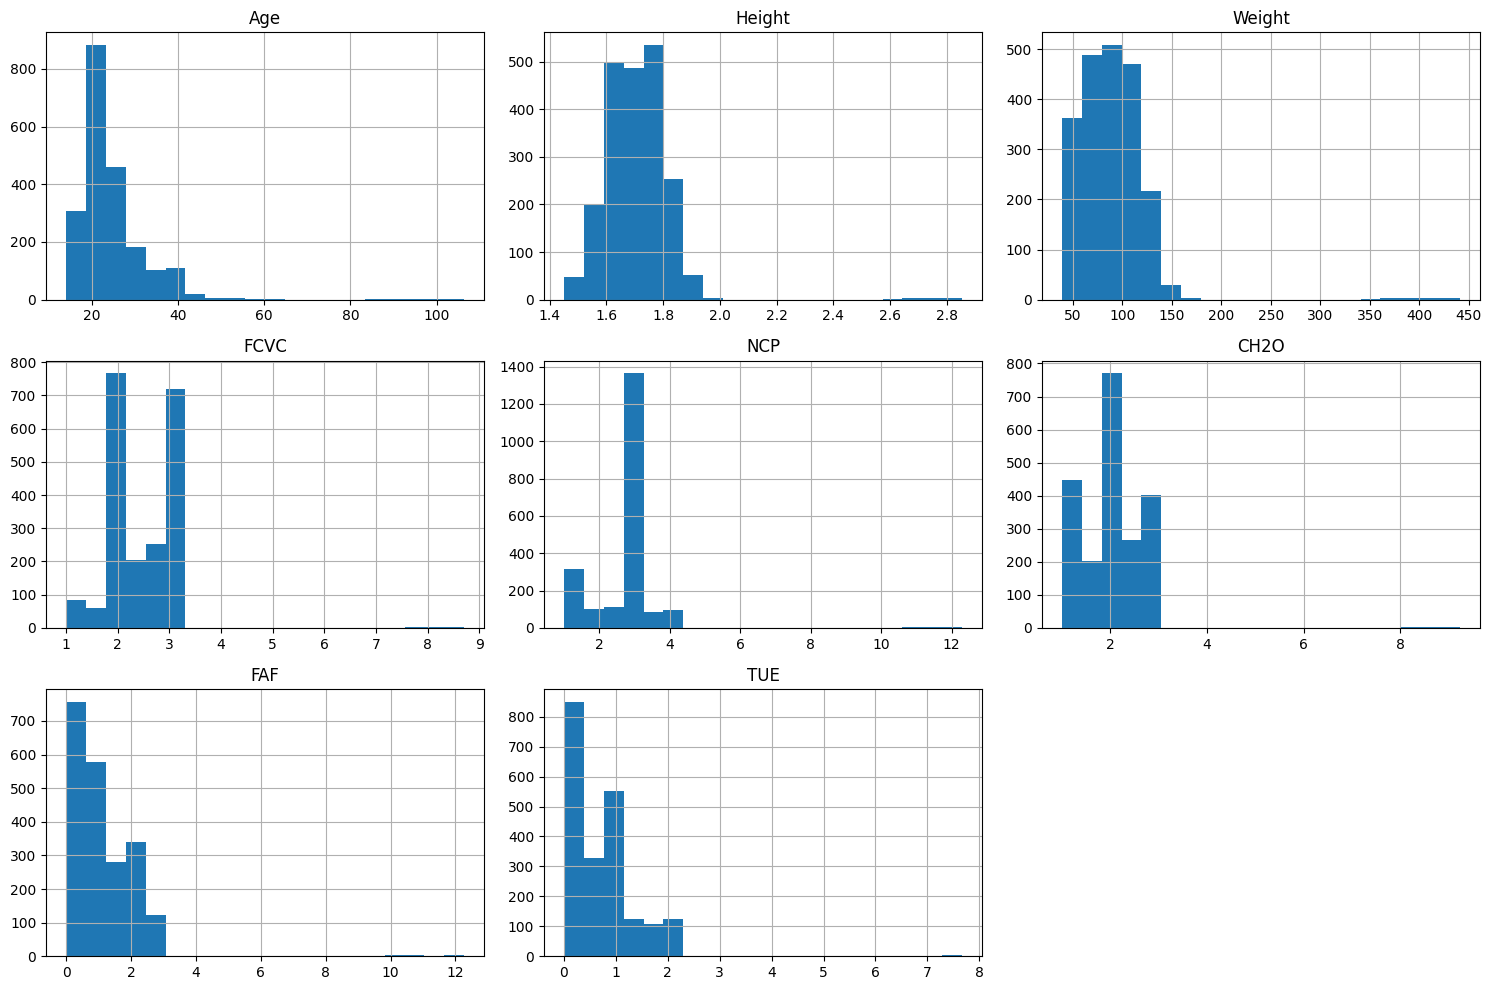

In [ ]:
if len(kolom_numerik) > 0:
    df[kolom_numerik].hist(bins=20, figsize=(15, 10))
    plt.tight_layout()
    plt.show()
else:
    print("Tidak ada kolom numerik untuk ditampilkan dalam histogram.")

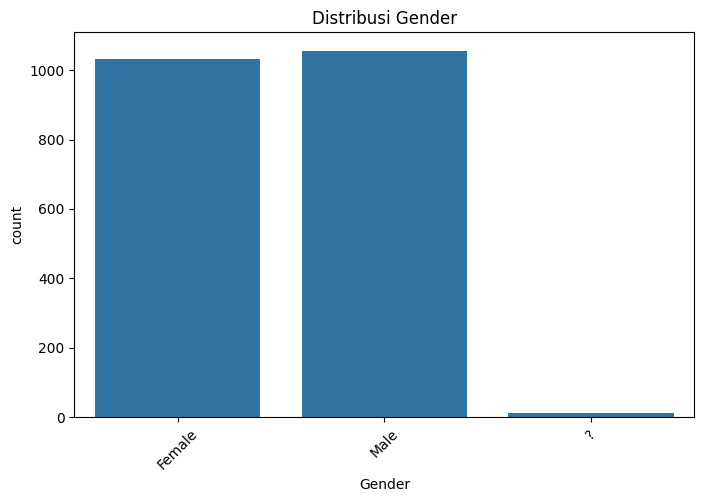

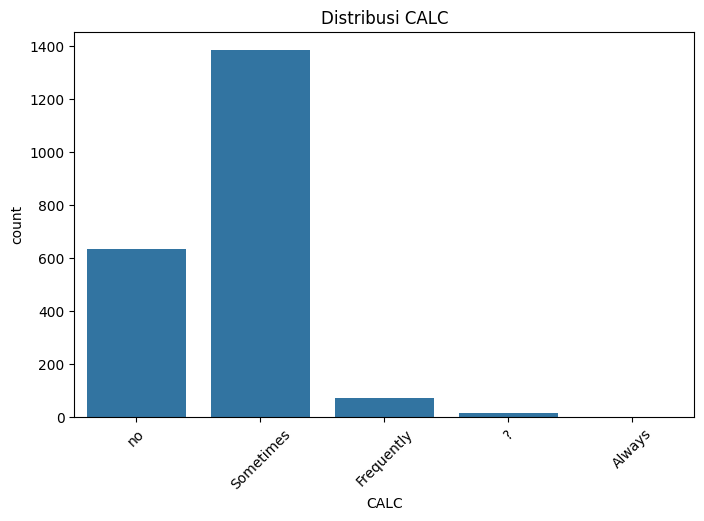

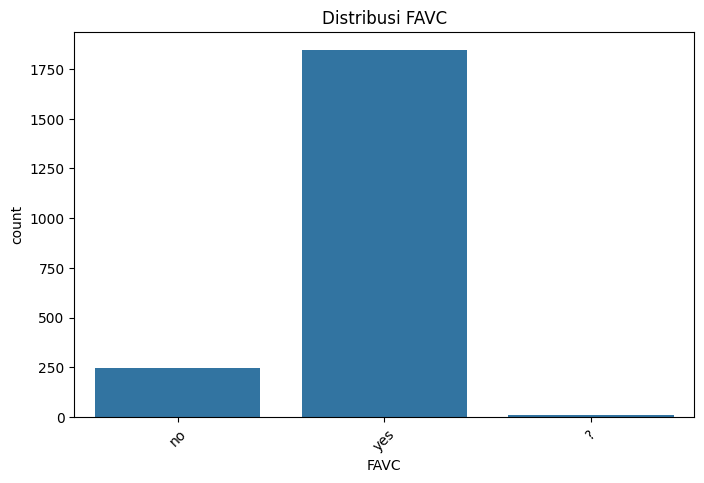

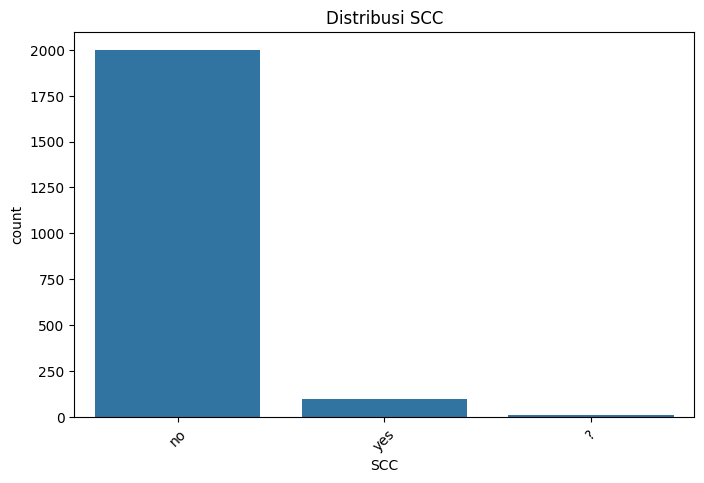

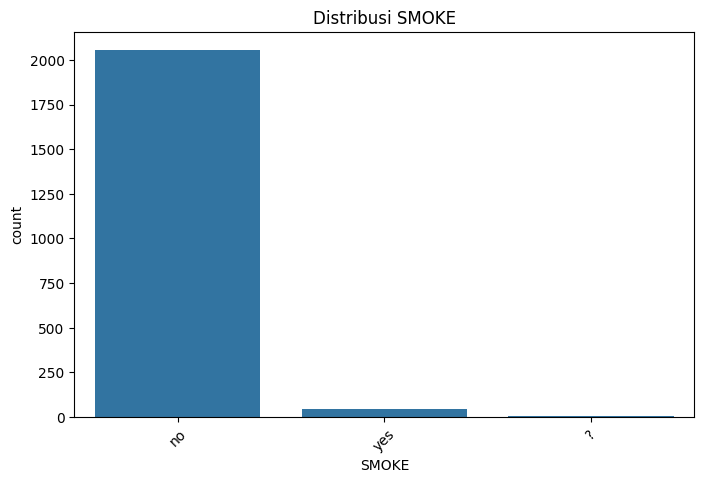

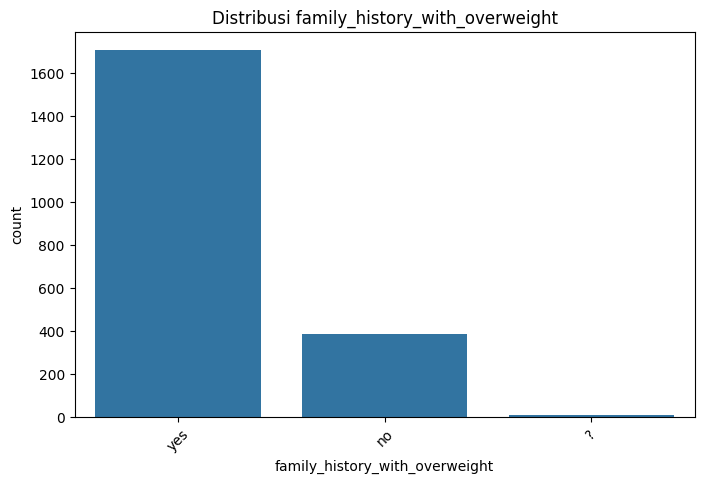

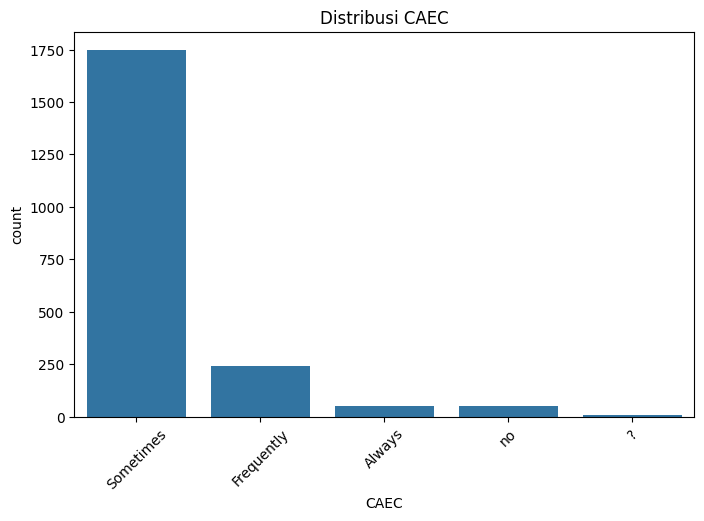

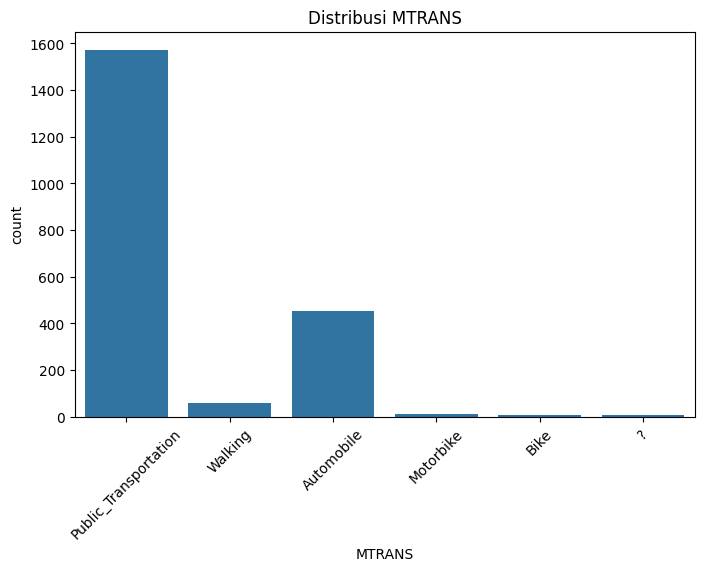

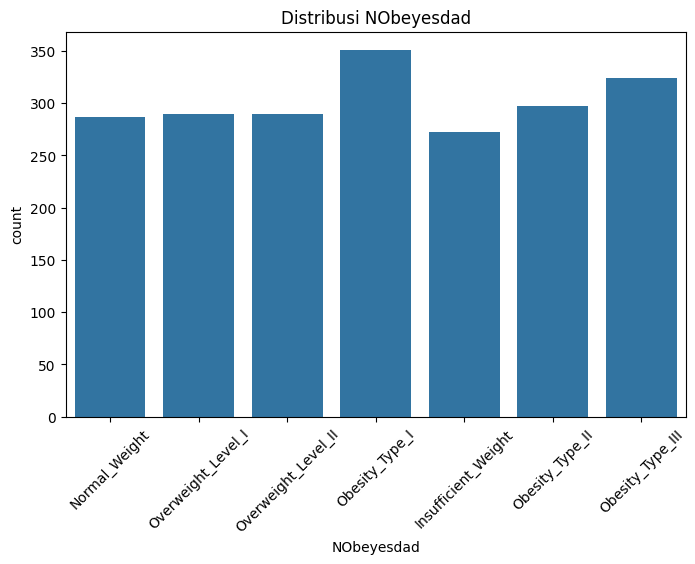

In [ ]:
kolom_kategorikal = df.select_dtypes(include=['object']).columns
for kolom in kolom_kategorikal:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=kolom)
    plt.xticks(rotation=45)
    plt.title(f'Distribusi {kolom}')
    plt.show()

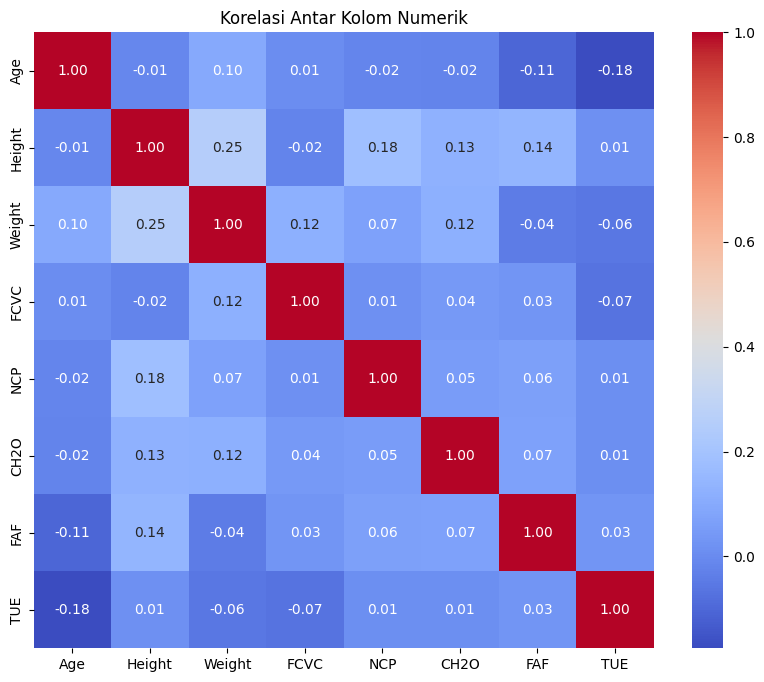

In [ ]:
if len(kolom_numerik) > 0:
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[kolom_numerik].corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Korelasi Antar Kolom Numerik')
    plt.show()
else:
    print("Tidak ada kolom numerik untuk heatmap korelasi.")

In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Age                               22
Gender                             9
Height                            22
Weight                            19
CALC                               5
FAVC                              11
FCVC                              18
NCP                               22
SCC                               10
SMOKE                              5
CH2O                              15
family_history_with_overweight    13
FAF                               19
TUE                               15
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64


In [ ]:
print("\nJumlah Nilai Unik per Kolom:")
for kolom in df.columns:
    print(f"{kolom}: {df[kolom].nunique()} nilai unik")


Jumlah Nilai Unik per Kolom:
Age: 1393 nilai unik
Gender: 3 nilai unik
Height: 1561 nilai unik
Weight: 1517 nilai unik
CALC: 5 nilai unik
FAVC: 3 nilai unik
FCVC: 807 nilai unik
NCP: 636 nilai unik
SCC: 3 nilai unik
SMOKE: 3 nilai unik
CH2O: 1262 nilai unik
family_history_with_overweight: 3 nilai unik
FAF: 1185 nilai unik
TUE: 1129 nilai unik
CAEC: 5 nilai unik
MTRANS: 6 nilai unik
NObeyesdad: 7 nilai unik


In [ ]:
print("\nJumlah Data Duplikat:", df.duplicated().sum())


Jumlah Data Duplikat: 18


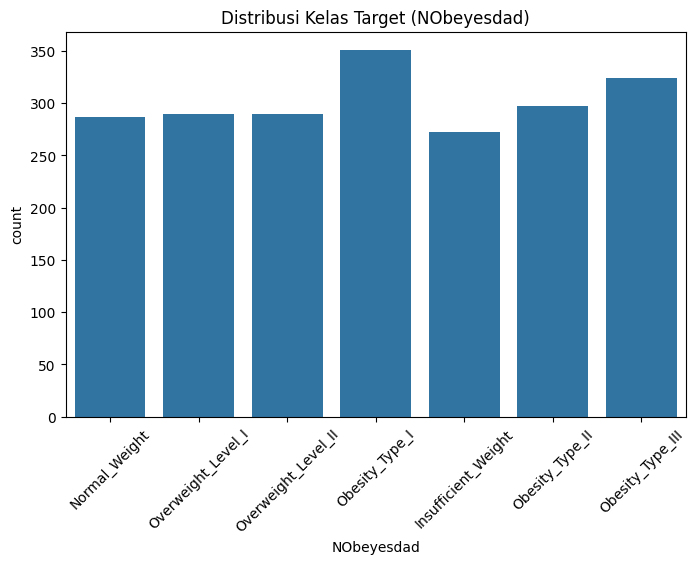


Distribusi Kelas Target:
NObeyesdad
Obesity_Type_I         0.166272
Obesity_Type_III       0.153482
Obesity_Type_II        0.140692
Overweight_Level_I     0.137376
Overweight_Level_II    0.137376
Normal_Weight          0.135955
Insufficient_Weight    0.128849
Name: proportion, dtype: float64


In [ ]:
if 'NObeyesdad' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x='NObeyesdad')
    plt.xticks(rotation=45)
    plt.title('Distribusi Kelas Target (NObeyesdad)')
    plt.show()
    print("\nDistribusi Kelas Target:")
    print(df['NObeyesdad'].value_counts(normalize=True))
else:
    print("Kolom 'NObeyesdad' tidak ditemukan di dataset.")

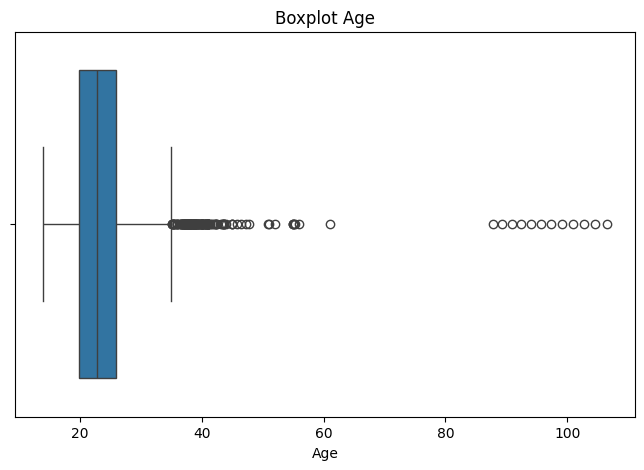

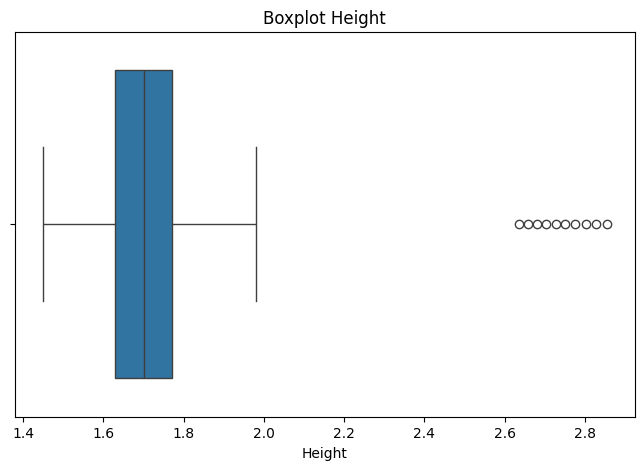

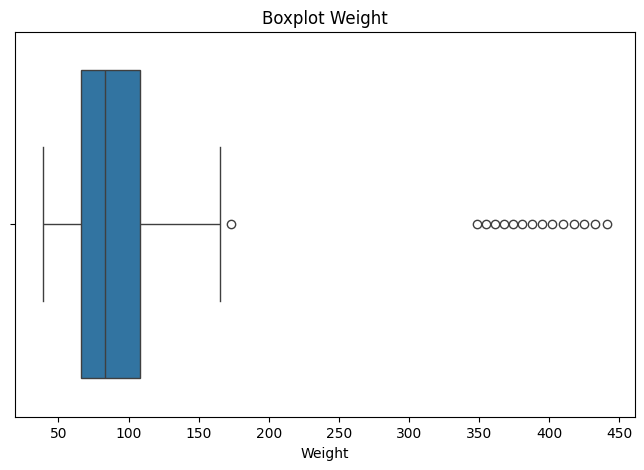

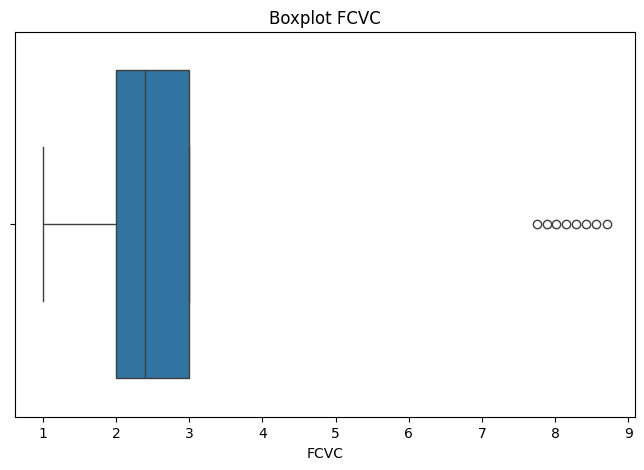

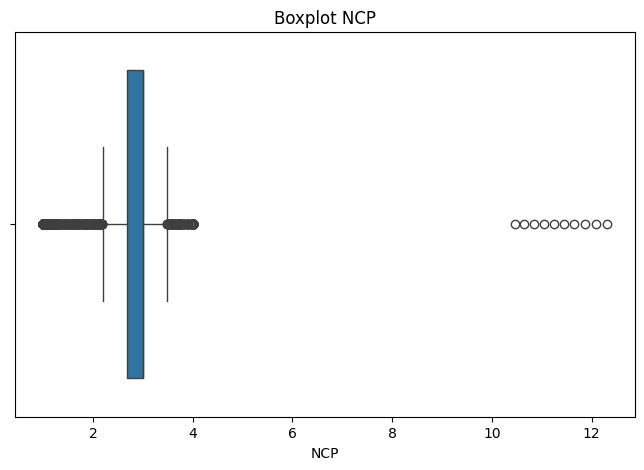

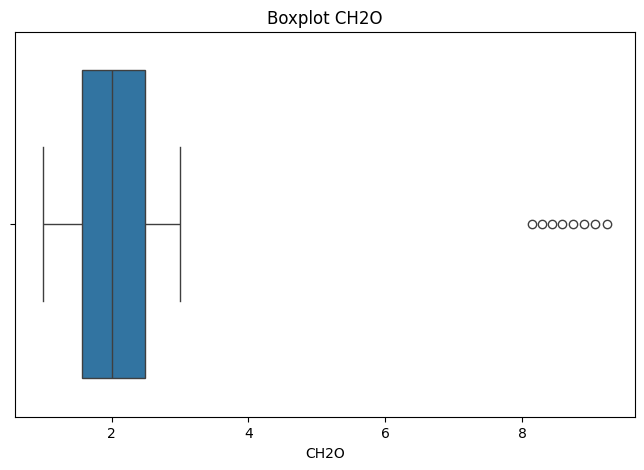

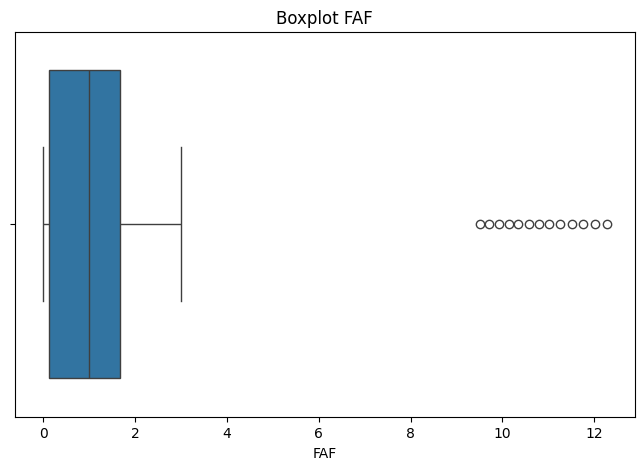

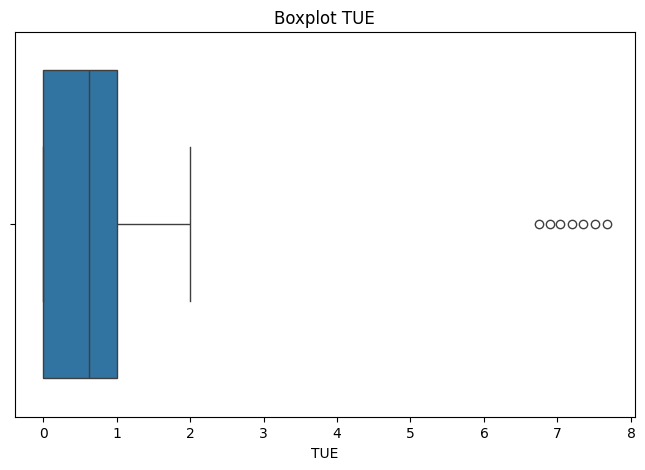

In [ ]:
if len(kolom_numerik) > 0:
    for kolom in kolom_numerik:
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=df, x=kolom)
        plt.title(f'Boxplot {kolom}')
        plt.show()
else:
    print("Tidak ada kolom numerik untuk deteksi outlier.")

In [ ]:
print("\nKesimpulan dari EDA:")
print(f"1. Dataset memiliki {df.shape[0]} baris dan {df.shape[1]} kolom.")
print(f"2. Tipe data: {len(kolom_numerik)} kolom numerik, {len(kolom_kategorikal)} kolom kategorikal.")
print(f"3. Missing values: {'Tidak ada' if df.isnull().sum().sum() == 0 else 'Ada, lihat detail di atas'}.")
print(f"4. Data duplikat: {df.duplicated().sum()} baris.")
print(f"5. Keseimbangan data: {'Cek distribusi kelas target di atas' if 'NObeyesdad' in df.columns else 'Kolom target tidak ditemukan'}.")
print(f"6. Outlier: {'Terdeteksi pada kolom numerik (lihat boxplot)' if len(kolom_numerik) > 0 else 'Tidak ada kolom numerik untuk deteksi outlier'}.")
print("7. Korelasi: Pola korelasi terlihat pada kolom numerik (lihat heatmap jika ada).")


Kesimpulan dari EDA:
1. Dataset memiliki 2111 baris dan 17 kolom.
2. Tipe data: 8 kolom numerik, 9 kolom kategorikal.
3. Missing values: Ada, lihat detail di atas.
4. Data duplikat: 18 baris.
5. Keseimbangan data: Cek distribusi kelas target di atas.
6. Outlier: Terdeteksi pada kolom numerik (lihat boxplot).
7. Korelasi: Pola korelasi terlihat pada kolom numerik (lihat heatmap jika ada).


In [ ]:
for kolom in df.columns:
    if df[kolom].isnull().sum() > 0:
        if df[kolom].dtype in ['float64', 'int64']:
            df[kolom] = df[kolom].fillna(df[kolom].median())
        else:
            df[kolom] = df[kolom].fillna(df[kolom].mode()[0])
print("Missing values setelah penanganan:\n", df.isnull().sum())

Missing values setelah penanganan:
 Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [ ]:
# Filter nilai yang realistis
df = df[df['Age'].between(0, 120)]
df = df[df['Height'].between(1, 2.5)]
df = df[df['Weight'].between(20, 300)]
# Sesuaikan rentang untuk kolom lain berdasarkan domain knowledge
df = df[df['FCVC'].between(1, 3)]  # Frekuensi konsumsi sayur
df = df[df['NCP'].between(1, 4)]   # Jumlah makan per hari
df = df[df['CH2O'].between(1, 3)]  # Konsumsi air
df = df[df['FAF'].between(0, 3)]   # Frekuensi aktivitas fisik
df = df[df['TUE'].between(0, 2)]   # Waktu penggunaan teknologi
print("Jumlah baris setelah pembersihan error:", df.shape[0])

Jumlah baris setelah pembersihan error: 2041


In [ ]:
df.drop_duplicates(inplace=True)
print("Jumlah data duplikat setelah penghapusan:", df.duplicated().sum())

Jumlah data duplikat setelah penghapusan: 0


Outlier pada Age ditangani dengan capping.
Outlier pada Height ditangani dengan capping.
Outlier pada Weight ditangani dengan capping.
Outlier pada FCVC ditangani dengan capping.
Outlier pada NCP ditangani dengan capping.
Outlier pada CH2O ditangani dengan capping.
Outlier pada FAF ditangani dengan capping.
Outlier pada TUE ditangani dengan capping.


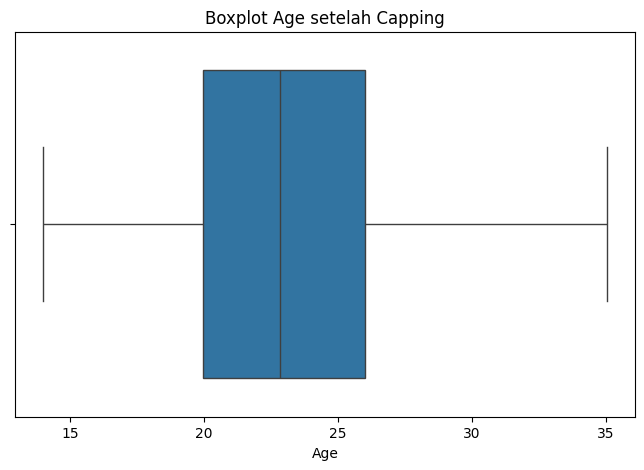

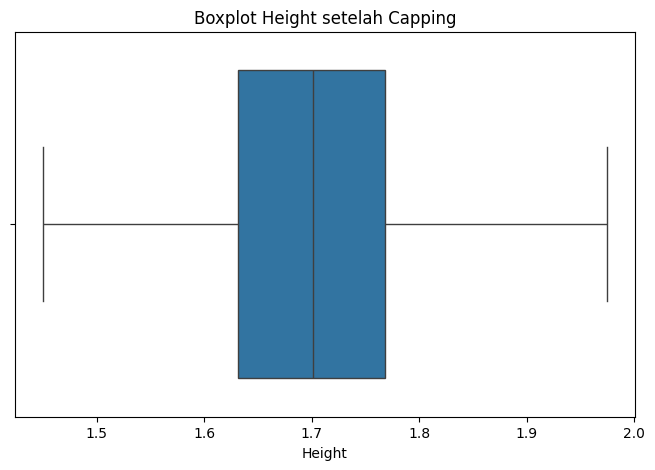

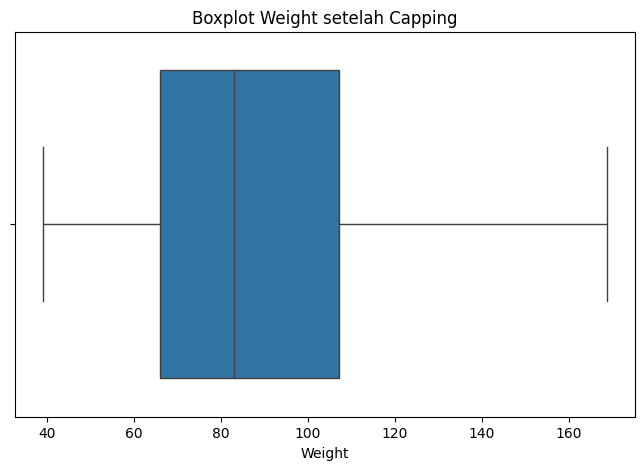

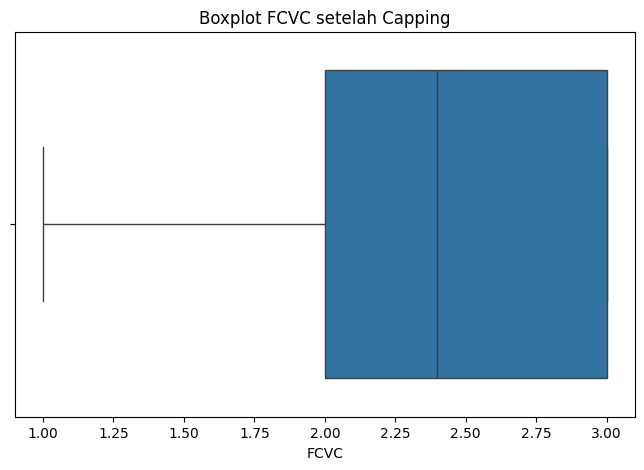

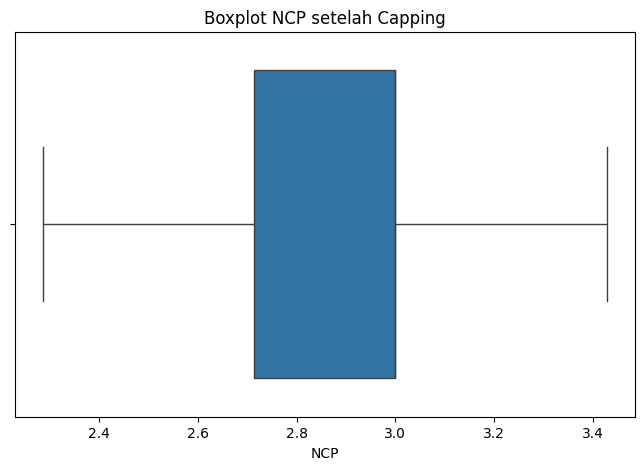

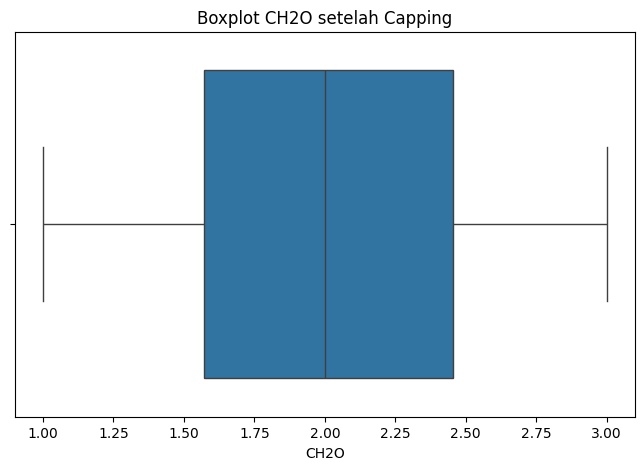

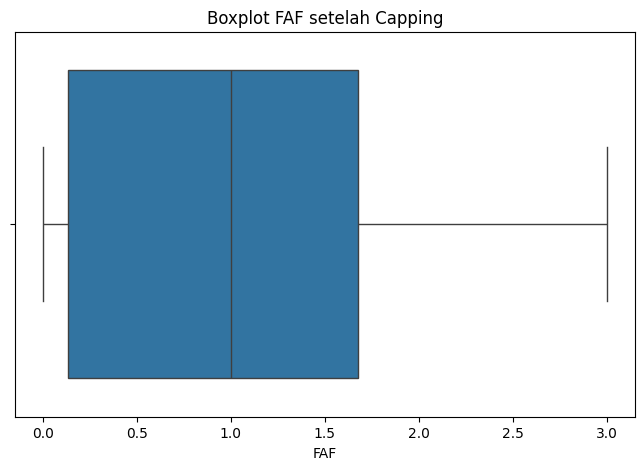

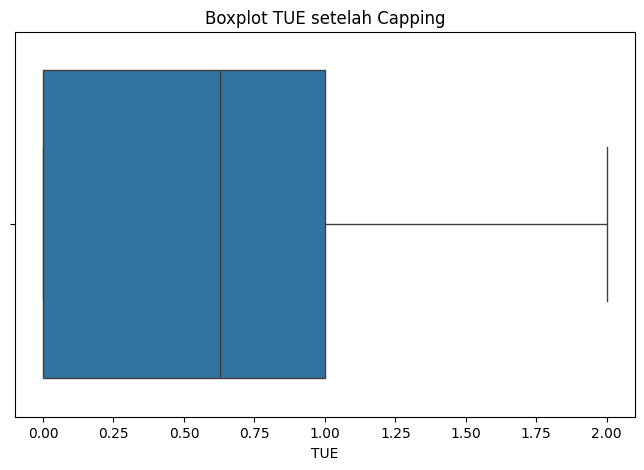

In [ ]:
kolom_numerik = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for kolom in kolom_numerik:
    Q1 = df[kolom].quantile(0.25)
    Q3 = df[kolom].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[kolom] = df[kolom].clip(lower=lower_bound, upper=upper_bound)
    print(f"Outlier pada {kolom} ditangani dengan capping.")
# Visualisasi ulang boxplot untuk memeriksa hasil
for kolom in kolom_numerik:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=kolom)
    plt.title(f'Boxplot {kolom} setelah Capping')
    plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding untuk kolom biner
kolom_biner = ['Gender', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight']
label_encoder = LabelEncoder()
for kolom in kolom_biner:
    df[kolom] = label_encoder.fit_transform(df[kolom])

# One-Hot Encoding untuk kolom non-ordinal
kolom_onehot = ['CALC', 'CAEC', 'MTRANS']
df = pd.get_dummies(df, columns=kolom_onehot, drop_first=True)

# Label Encoding untuk NObeyesdad (opsional, tergantung model)
df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])

print("Kolom setelah encoding:\n", df.columns)

Kolom setelah encoding:
 Index(['Age', 'Gender', 'Height', 'Weight', 'FAVC', 'FCVC', 'NCP', 'SCC',
       'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'NObeyesdad', 'CALC_Always', 'CALC_Frequently', 'CALC_Sometimes',
       'CALC_no', 'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes',
       'CAEC_no', 'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importance:\n", feature_importance)

# Pilih fitur dengan importance > 0.01
fitur_penting = feature_importance[feature_importance > 0.01].index
df = df[fitur_penting.tolist() + ['NObeyesdad']]
print("Fitur setelah seleksi:\n", df.columns)

Feature Importance:
 Weight                            0.306041
Height                            0.095315
FCVC                              0.095174
Age                               0.089770
Gender                            0.052823
TUE                               0.051164
CH2O                              0.046689
FAF                               0.045833
NCP                               0.044146
family_history_with_overweight    0.031183
CALC_Sometimes                    0.020617
CAEC_Sometimes                    0.019587
CALC_no                           0.018036
CAEC_Frequently                   0.015414
FAVC                              0.015410
MTRANS_Public_Transportation      0.014555
MTRANS_Automobile                 0.013696
SCC                               0.006043
CAEC_Always                       0.004335
CALC_Frequently                   0.004084
MTRANS_Walking                    0.003398
SMOKE                             0.003076
CAEC_no                          

In [ ]:
print("Distribusi kelas NObeyesdad:\n", df['NObeyesdad'].value_counts(normalize=True))

Distribusi kelas NObeyesdad:
 NObeyesdad
2    0.170623
4    0.156281
3    0.141444
6    0.138477
1    0.135015
5    0.131553
0    0.126607
Name: proportion, dtype: float64


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']
X_resampled, y_resampled = smote.fit_resample(X, y)

df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='NObeyesdad')], axis=1)
print("Distribusi kelas setelah SMOTE:\n", df_resampled['NObeyesdad'].value_counts(normalize=True))

Distribusi kelas setelah SMOTE:
 NObeyesdad
1    0.142857
5    0.142857
6    0.142857
2    0.142857
0    0.142857
3    0.142857
4    0.142857
Name: proportion, dtype: float64


In [ ]:
from sklearn.preprocessing import StandardScaler

kolom_numerik = df.select_dtypes(include=['float64', 'int64']).columns.drop('NObeyesdad', errors='ignore')
scaler = StandardScaler()
df[kolom_numerik] = scaler.fit_transform(df[kolom_numerik])
print("Data numerik setelah standarisasi:\n", df[kolom_numerik].describe())

Data numerik setelah standarisasi:
              Weight        Height          FCVC           Age        Gender  \
count  2.022000e+03  2.022000e+03  2.022000e+03  2.022000e+03  2.022000e+03   
mean  -5.622494e-17  6.746993e-16  8.012055e-16 -5.341370e-16  2.424701e-16   
std    1.000247e+00  1.000247e+00  1.000247e+00  1.000247e+00  1.000247e+00   
min   -1.842958e+00 -2.716765e+00 -2.670127e+00 -1.879973e+00 -2.915256e+00   
25%   -8.041893e-01 -7.663310e-01 -7.952479e-01 -7.534418e-01 -9.646777e-01   
50%   -1.501498e-01 -1.471770e-02 -5.038846e-02 -2.189733e-01  9.859006e-01   
75%    7.764397e-01  7.086637e-01  1.079631e+00  3.793973e-01  9.859006e-01   
max    3.147383e+00  2.921156e+00  1.079631e+00  2.078656e+00  9.859006e-01   

                TUE          CH2O           FAF           NCP  \
count  2.022000e+03  2.022000e+03  2.022000e+03  2.022000e+03   
mean   2.811247e-17  4.919683e-17 -1.124499e-16  9.909646e-16   
std    1.000247e+00  1.000247e+00  1.000247e+00  1.000247

<ipython-input-105-86b45d819c9d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[kolom_numerik] = scaler.fit_transform(df[kolom_numerik])


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ObesityDataSet.csv')
print("Jumlah baris awal:", df.shape[0])

Jumlah baris awal: 2111


In [ ]:
kolom_numerik = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for kolom in kolom_numerik:
    if kolom in df.columns:
        df[kolom] = pd.to_numeric(df[kolom], errors='coerce')
        print(f"Kolom {kolom} dikonversi ke numerik.")

Kolom Age dikonversi ke numerik.
Kolom Height dikonversi ke numerik.
Kolom Weight dikonversi ke numerik.
Kolom FCVC dikonversi ke numerik.
Kolom NCP dikonversi ke numerik.
Kolom CH2O dikonversi ke numerik.
Kolom FAF dikonversi ke numerik.
Kolom TUE dikonversi ke numerik.


In [ ]:
for kolom in df.columns:
    if df[kolom].isnull().sum() > 0:
        if df[kolom].dtype in ['float64', 'int64']:
            df[kolom] = df[kolom].fillna(df[kolom].median())
        else:
            df[kolom] = df[kolom].fillna(df[kolom].mode()[0])
print("Missing values setelah penanganan:\n", df.isnull().sum())

Missing values setelah penanganan:
 Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [ ]:
print("Rentang data sebelum pembersihan:")
print(df[kolom_numerik].describe())
df = df[df['Age'].between(0, 120)]
df = df[df['Height'].between(1, 2.5)]
df = df[df['Weight'].between(20, 300)]
df = df[df['FCVC'].between(1, 3)]
df = df[df['NCP'].between(1, 4)]
df = df[df['CH2O'].between(1, 3)]
df = df[df['FAF'].between(0, 3)]
df = df[df['TUE'].between(0, 2)]
print("Jumlah baris setelah pembersihan error:", df.shape[0])

Rentang data sebelum pembersihan:
               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.698093     1.706567    88.557708     2.443125     2.732238   
std       8.349701     0.117086    35.995366     0.640021     0.976382   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.994054     1.630000    66.000000     2.000000     2.690195   
50%      22.814657     1.701284    83.000000     2.397284     3.000000   
75%      26.000000     1.769299   107.973142     3.000000     3.000000   
max     106.441252     2.853986   441.131078     8.706795    12.299828   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.030343     1.072774     0.679749  
std       0.735322     1.144198     0.714621  
min       1.000000     0.000000     0.000000  
25%       1.590922     0.132000     0.000000  
50%       2.00000

In [ ]:
print("Jumlah data duplikat sebelum:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Jumlah data duplikat setelah:", df.duplicated().sum())

Jumlah data duplikat sebelum: 19
Jumlah data duplikat setelah: 0


In [ ]:
for kolom in kolom_numerik:
    Q1 = df[kolom].quantile(0.25)
    Q3 = df[kolom].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[kolom] = df[kolom].clip(lower=lower_bound, upper=upper_bound)
    print(f"Outlier pada {kolom} ditangani dengan capping.")

Outlier pada Age ditangani dengan capping.
Outlier pada Height ditangani dengan capping.
Outlier pada Weight ditangani dengan capping.
Outlier pada FCVC ditangani dengan capping.
Outlier pada NCP ditangani dengan capping.
Outlier pada CH2O ditangani dengan capping.
Outlier pada FAF ditangani dengan capping.
Outlier pada TUE ditangani dengan capping.


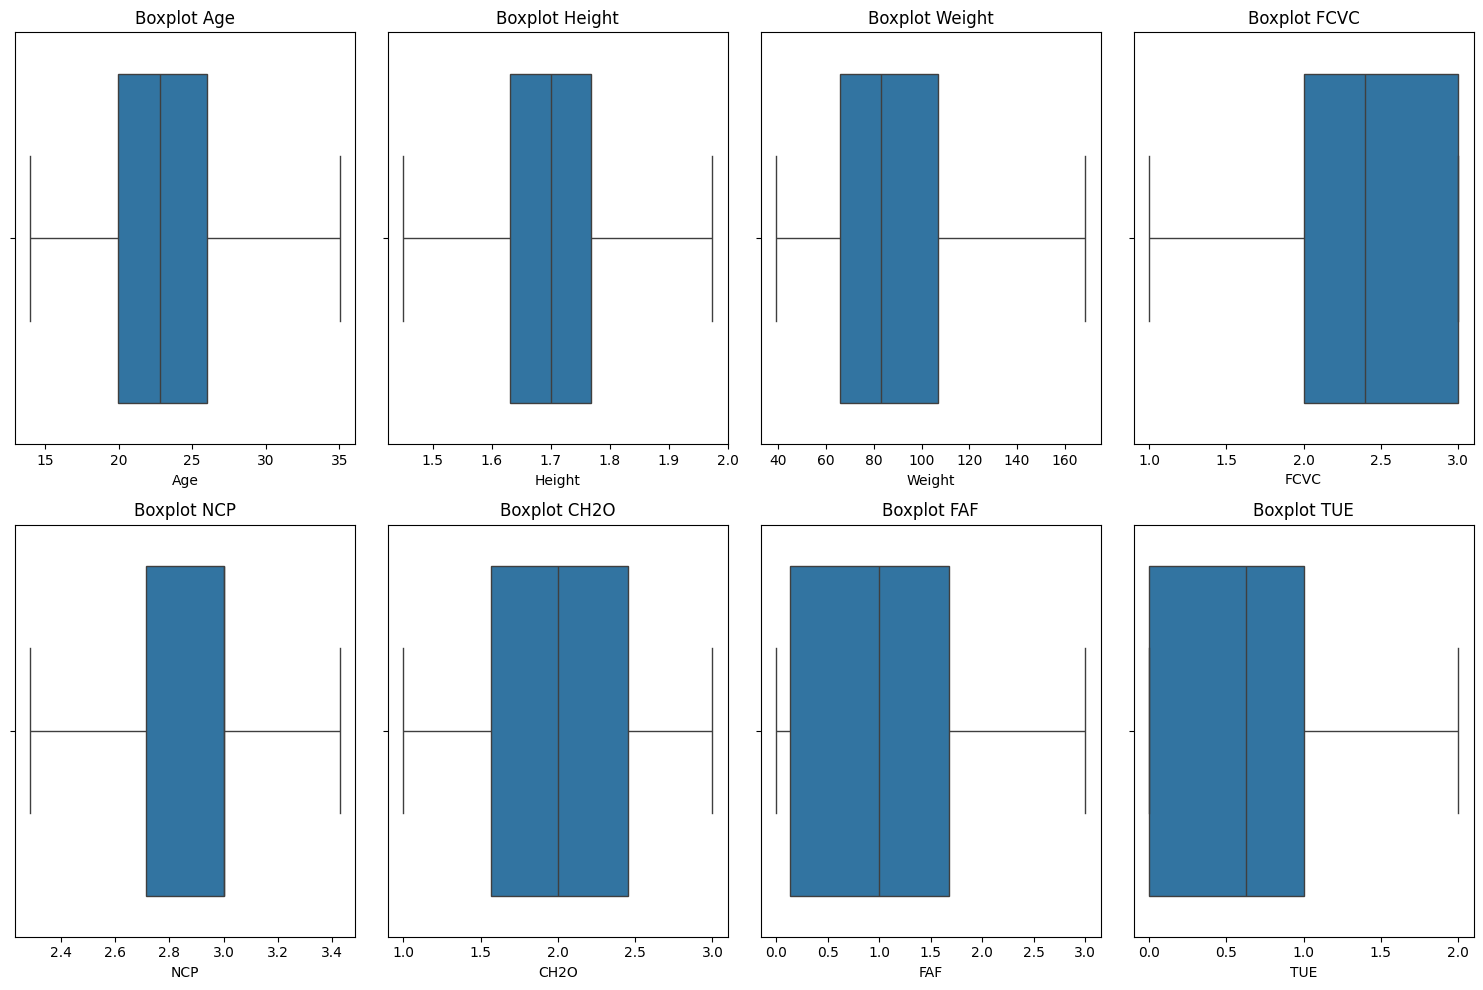

In [ ]:
plt.figure(figsize=(15, 10))
for i, kolom in enumerate(kolom_numerik, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data=df, x=kolom)
    plt.title(f'Boxplot {kolom}')
plt.tight_layout()
plt.show()

In [ ]:
kolom_biner = ['Gender', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight']
label_encoder = LabelEncoder()
for kolom in kolom_biner:
    if kolom in df.columns and df[kolom].dtype == 'object':
        df[kolom] = label_encoder.fit_transform(df[kolom])

In [ ]:
kolom_onehot = ['CALC', 'CAEC', 'MTRANS']
df = pd.get_dummies(df, columns=[kolom for kolom in kolom_onehot if kolom in df.columns], drop_first=True)

In [ ]:
if df['NObeyesdad'].dtype == 'object':
    df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])

In [ ]:
kolom_bool = df.select_dtypes(include=['bool']).columns
df[kolom_bool] = df[kolom_bool].astype(int)

print("Tipe data setelah encoding:\n", df.dtypes)

Tipe data setelah encoding:
 Age                               float64
Gender                              int64
Height                            float64
Weight                            float64
FAVC                                int64
FCVC                              float64
NCP                               float64
SCC                                 int64
SMOKE                               int64
CH2O                              float64
family_history_with_overweight      int64
FAF                               float64
TUE                               float64
NObeyesdad                          int64
CALC_Always                         int64
CALC_Frequently                     int64
CALC_Sometimes                      int64
CALC_no                             int64
CAEC_Always                         int64
CAEC_Frequently                     int64
CAEC_Sometimes                      int64
CAEC_no                             int64
MTRANS_Automobile                   int64
MTRAN

In [ ]:
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importance:\n", feature_importance)

Feature Importance:
 Weight                            0.306041
Height                            0.095315
FCVC                              0.095174
Age                               0.089770
Gender                            0.052823
TUE                               0.051164
CH2O                              0.046689
FAF                               0.045833
NCP                               0.044146
family_history_with_overweight    0.031183
CALC_Sometimes                    0.020617
CAEC_Sometimes                    0.019587
CALC_no                           0.018036
CAEC_Frequently                   0.015414
FAVC                              0.015410
MTRANS_Public_Transportation      0.014555
MTRANS_Automobile                 0.013696
SCC                               0.006043
CAEC_Always                       0.004335
CALC_Frequently                   0.004084
MTRANS_Walking                    0.003398
SMOKE                             0.003076
CAEC_no                          

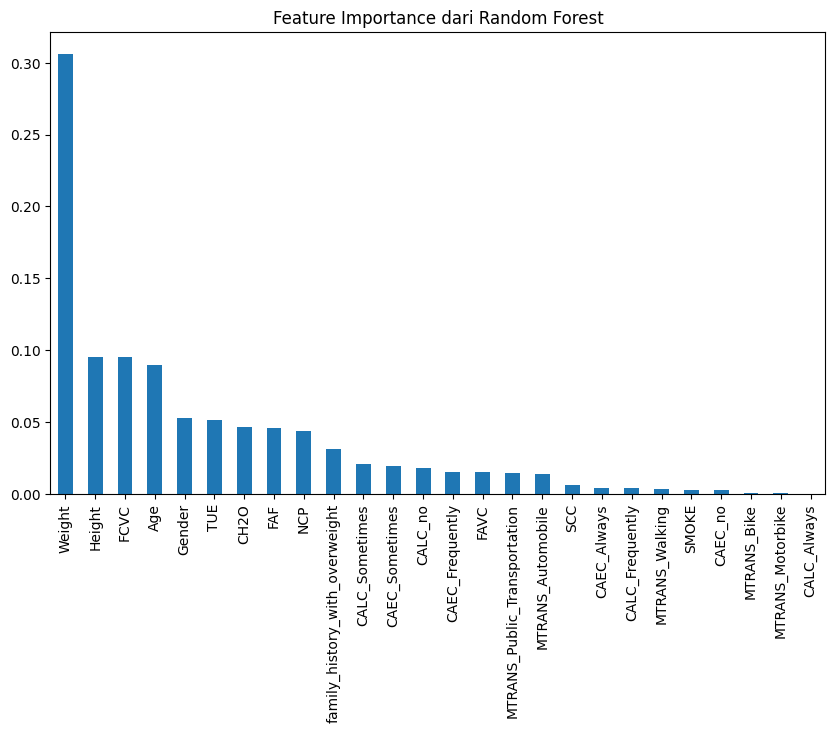

In [ ]:
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance dari Random Forest')
plt.show()

In [ ]:
fitur_penting = feature_importance[feature_importance > 0.01].index
df = df[fitur_penting.tolist() + ['NObeyesdad']]
print("Fitur setelah seleksi:\n", df.columns)

Fitur setelah seleksi:
 Index(['Weight', 'Height', 'FCVC', 'Age', 'Gender', 'TUE', 'CH2O', 'FAF',
       'NCP', 'family_history_with_overweight', 'CALC_Sometimes',
       'CAEC_Sometimes', 'CALC_no', 'CAEC_Frequently', 'FAVC',
       'MTRANS_Public_Transportation', 'MTRANS_Automobile', 'NObeyesdad'],
      dtype='object')


In [ ]:
print("Distribusi kelas NObeyesdad sebelum SMOTE:\n", df['NObeyesdad'].value_counts(normalize=True))

Distribusi kelas NObeyesdad sebelum SMOTE:
 NObeyesdad
2    0.170623
4    0.156281
3    0.141444
6    0.138477
1    0.135015
5    0.131553
0    0.126607
Name: proportion, dtype: float64


In [ ]:
smote = SMOTE(random_state=42)
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']
X_resampled, y_resampled = smote.fit_resample(X, y)
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='NObeyesdad')], axis=1)

In [ ]:
print("Distribusi kelas setelah SMOTE:\n", df_resampled['NObeyesdad'].value_counts(normalize=True))

Distribusi kelas setelah SMOTE:
 NObeyesdad
1    0.142857
5    0.142857
6    0.142857
2    0.142857
0    0.142857
3    0.142857
4    0.142857
Name: proportion, dtype: float64


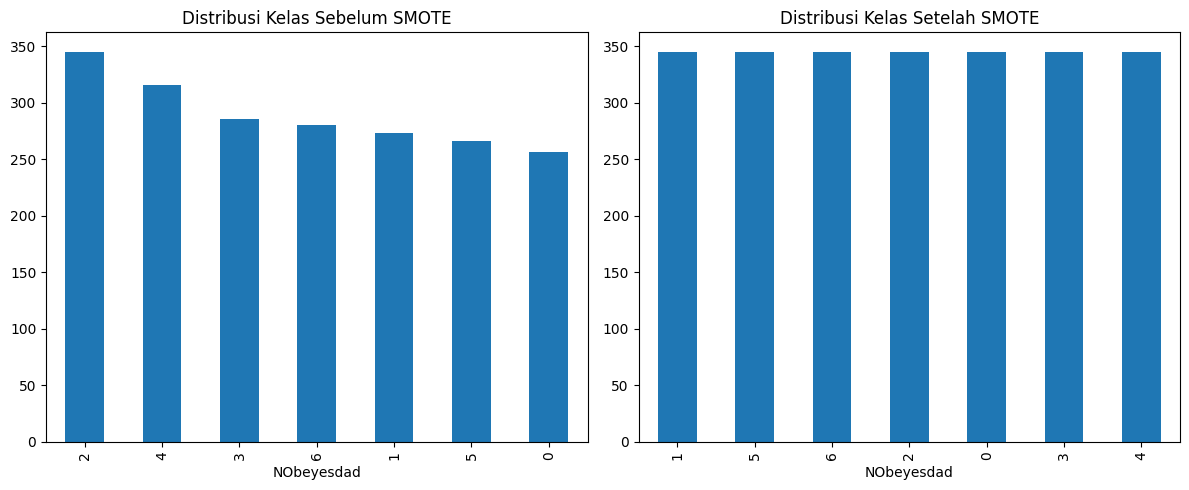

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df['NObeyesdad'].value_counts().plot(kind='bar')
plt.title('Distribusi Kelas Sebelum SMOTE')
plt.subplot(1, 2, 2)
pd.Series(y_resampled).value_counts().plot(kind='bar')
plt.title('Distribusi Kelas Setelah SMOTE')
plt.tight_layout()
plt.show()

In [ ]:
scaler = StandardScaler()
df[kolom_numerik] = scaler.fit_transform(df[kolom_numerik])
print("Deskripsi data numerik setelah standarisasi:\n", df[kolom_numerik].describe())

Deskripsi data numerik setelah standarisasi:
                 Age        Height        Weight          FCVC           NCP  \
count  2.022000e+03  2.022000e+03  2.022000e+03  2.022000e+03  2.022000e+03   
mean  -5.341370e-16  6.746993e-16 -5.622494e-17  8.012055e-16  9.909646e-16   
std    1.000247e+00  1.000247e+00  1.000247e+00  1.000247e+00  1.000247e+00   
min   -1.879973e+00 -2.716765e+00 -1.842958e+00 -2.670127e+00 -1.720163e+00   
25%   -7.534418e-01 -7.663310e-01 -8.041893e-01 -7.952479e-01 -4.468482e-01   
50%   -2.189733e-01 -1.471770e-02 -1.501498e-01 -5.038846e-02  4.020282e-01   
75%    3.793973e-01  7.086637e-01  7.764397e-01  1.079631e+00  4.020282e-01   
max    2.078656e+00  2.921156e+00  3.147383e+00  1.079631e+00  1.675343e+00   

               CH2O           FAF           TUE  
count  2.022000e+03  2.022000e+03  2.022000e+03  
mean   4.919683e-17 -1.124499e-16  2.811247e-17  
std    1.000247e+00  1.000247e+00  1.000247e+00  
min   -1.648806e+00 -1.191822e+00 -1.09507

In [ ]:
df_resampled.to_csv('/content/drive/MyDrive/ObesityDataSet_Preprocessed.csv', index=False)
print("Dataset tersimpan sebagai ObesityDataSet_Preprocessed.csv")

Dataset tersimpan sebagai ObesityDataSet_Preprocessed.csv


In [ ]:
print("""
Kesimpulan Preprocessing Data:
Preprocessing data telah berhasil dilakukan dengan langkah-langkah berikut:
1. Missing values ditangani dengan mengisi nilai numerik menggunakan median dan nilai kategorikal menggunakan modus.
2. Error data dibersihkan dengan menerapkan batasan wajar pada kolom numerik, menghasilkan dataset yang lebih realistis.
3. Data duplikat dihapus untuk memastikan tidak ada redundansi.
4. Outlier ditangani dengan metode IQR dan capping untuk menjaga distribusi data tetap wajar.
5. Data kategorikal diubah menjadi numerik menggunakan LabelEncoder untuk kolom biner dan one-hot encoding untuk kolom dengan lebih dari dua kategori.
6. Seleksi fitur dilakukan menggunakan RandomForestClassifier, memilih fitur dengan importance > 0.01 untuk mengurangi dimensi data.
7. Ketidakseimbangan kelas pada kolom target 'NObeyesdad' diatasi menggunakan SMOTE, menghasilkan distribusi kelas yang seimbang.
8. Kolom numerik distandarisasi menggunakan StandardScaler untuk memastikan skala yang konsisten.
Dataset akhir disimpan sebagai 'ObesityDataSet_Preprocessed.csv' dan siap digunakan untuk pemodelan machine learning.
""")


Kesimpulan Preprocessing Data:
Preprocessing data telah berhasil dilakukan dengan langkah-langkah berikut:
1. Missing values ditangani dengan mengisi nilai numerik menggunakan median dan nilai kategorikal menggunakan modus.
2. Error data dibersihkan dengan menerapkan batasan wajar pada kolom numerik, menghasilkan dataset yang lebih realistis.
3. Data duplikat dihapus untuk memastikan tidak ada redundansi.
4. Outlier ditangani dengan metode IQR dan capping untuk menjaga distribusi data tetap wajar.
5. Data kategorikal diubah menjadi numerik menggunakan LabelEncoder untuk kolom biner dan one-hot encoding untuk kolom dengan lebih dari dua kategori.
6. Seleksi fitur dilakukan menggunakan RandomForestClassifier, memilih fitur dengan importance > 0.01 untuk mengurangi dimensi data.
7. Ketidakseimbangan kelas pada kolom target 'NObeyesdad' diatasi menggunakan SMOTE, menghasilkan distribusi kelas yang seimbang.
8. Kolom numerik distandarisasi menggunakan StandardScaler untuk memastikan skala 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ObesityDataSet_Preprocessed.csv')
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

In [ ]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
print("Fitur dengan korelasi tinggi (>0.8):", to_drop)

Fitur dengan korelasi tinggi (>0.8): ['CALC_no', 'MTRANS_Automobile']


In [ ]:
if to_drop:
    X = X.drop(to_drop, axis=1)
    df = df.drop(to_drop, axis=1)
    print("Fitur yang dihapus:", to_drop)

Fitur yang dihapus: ['CALC_no', 'MTRANS_Automobile']


In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Ukuran data training:", X_train.shape)
print("Ukuran data testing:", X_test.shape)

Ukuran data training: (1932, 15)
Ukuran data testing: (483, 15)


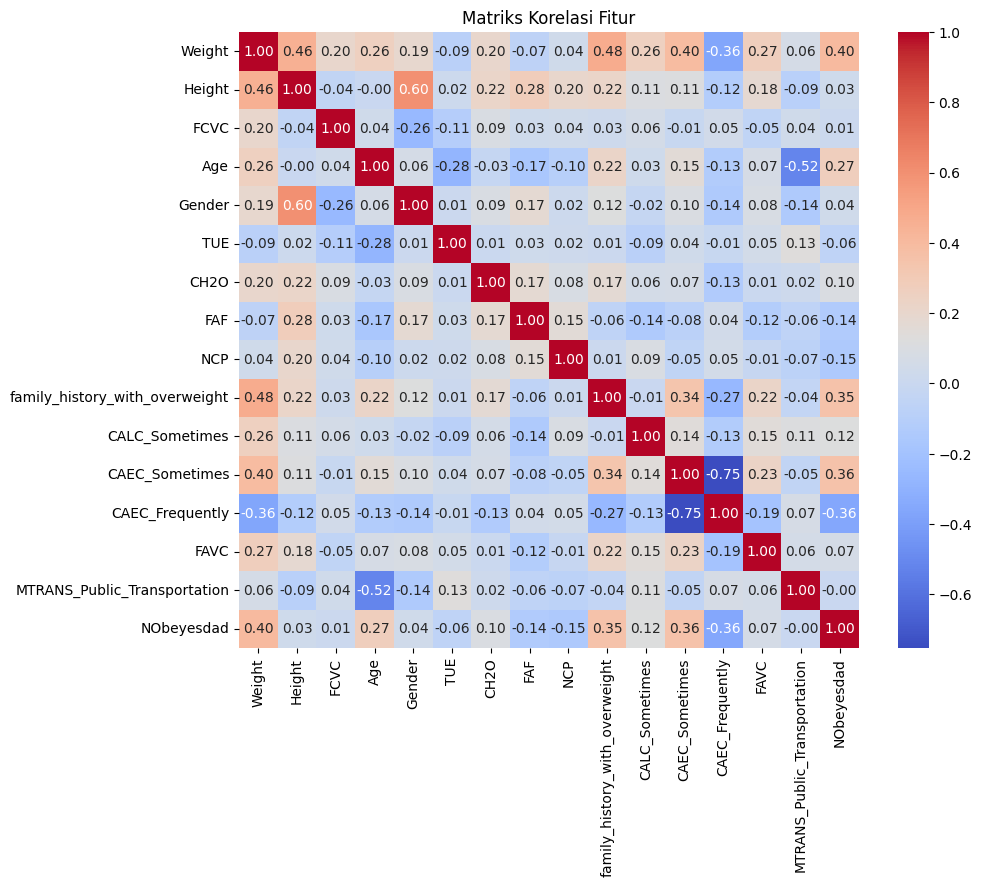

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi Fitur')
plt.show()

In [ ]:
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=10000, solver='liblinear', C=0.01),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='mlogloss')
}

In [ ]:
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [ ]:
results['Model'].append(name)
results['Accuracy'].append(accuracy)
results['Precision'].append(precision)
results['Recall'].append(recall)
results['F1-Score'].append(f1)

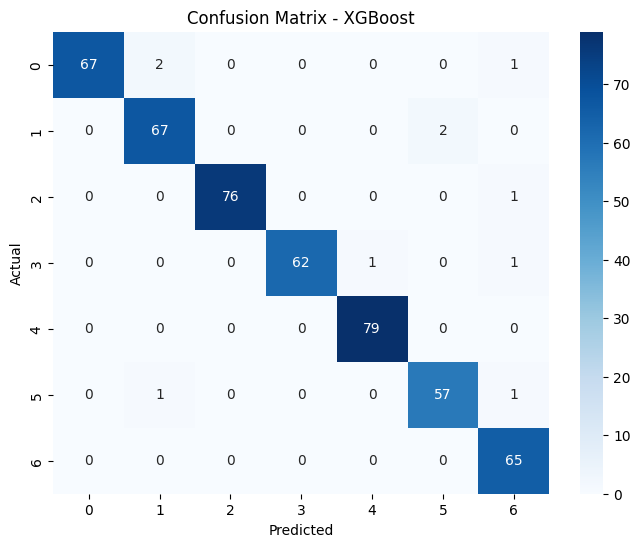


Hasil Evaluasi XGBoost:
Accuracy: 0.9793
Precision: 0.9799
Recall: 0.9793
F1-Score: 0.9794


In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(f"\nHasil Evaluasi {name}:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

In [ ]:
results_df = pd.DataFrame(results)
print("\nPerbandingan Performa Model:")
print(results_df)


Perbandingan Performa Model:
     Model  Accuracy  Precision    Recall  F1-Score
0  XGBoost  0.979296   0.979891  0.979296  0.979356


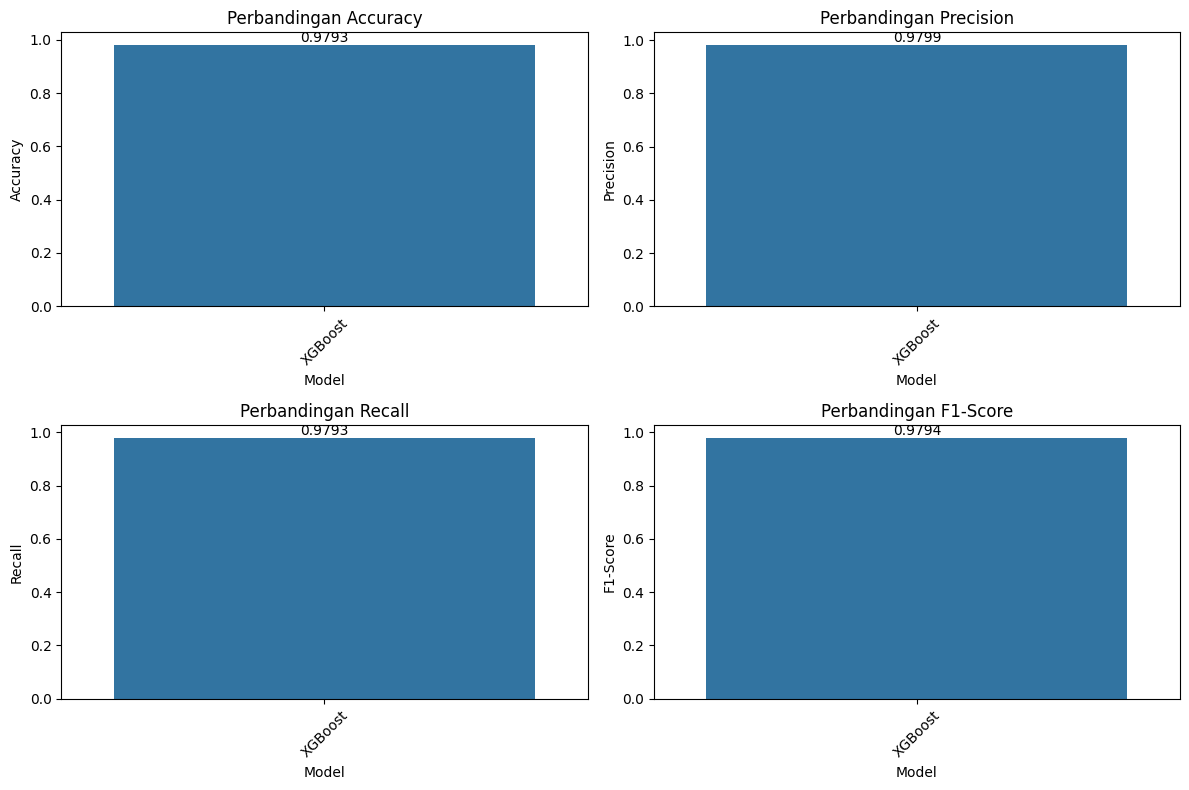

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
plt.figure(figsize=(12, 8))
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.barplot(x='Model', y=metric, data=results_df)
    plt.title(f'Perbandingan {metric}')
    plt.xticks(rotation=45)
    for index, value in enumerate(results_df[metric]):
        plt.text(index, value, f'{value:.4f}', ha='center', va='bottom')
plt.tight_layout()

In [ ]:
chart_data = {
    "type": "bar",
    "data": {
        "labels": results_df['Model'].tolist(),
        "datasets": [
            {
                "label": "Accuracy",
                "data": results_df['Accuracy'].tolist(),
                "backgroundColor": "rgba(75, 192, 192, 0.6)",
                "borderColor": "rgba(75, 192, 192, 1)",
                "borderWidth": 1
            },
            {
                "label": "Precision",
                "data": results_df['Precision'].tolist(),
                "backgroundColor": "rgba(255, 99, 132, 0.6)",
                "borderColor": "rgba(255, 99, 132, 1)",
                "borderWidth": 1
            },
            {
                "label": "Recall",
                "data": results_df['Recall'].tolist(),
                "backgroundColor": "rgba(54, 162, 235, 0.6)",
                "borderColor": "rgba(54, 162, 235, 1)",
                "borderWidth": 1
            },
            {
                "label": "F1-Score",
                "data": results_df['F1-Score'].tolist(),
                "backgroundColor": "rgba(255, 206, 86, 0.6)",
                "borderColor": "rgba(255, 206, 86, 1)",
                "borderWidth": 1
            }
        ]
    },
    "options": {
        "scales": {
            "y": {
                "beginAtZero": True,
                "max": 1
            }
        },
        "plugins": {
            "legend": {
                "position": "top"
            },
            "title": {
                "display": True,
                "text": "Perbandingan Performa Model"
            }
        }
    }
}
print("\nChart Perbandingan Performa Model:")
print("```chartjs")
print(chart_data)
print("```")


Chart Perbandingan Performa Model:
```chartjs
{'type': 'bar', 'data': {'labels': ['XGBoost'], 'datasets': [{'label': 'Accuracy', 'data': [0.979296066252588], 'backgroundColor': 'rgba(75, 192, 192, 0.6)', 'borderColor': 'rgba(75, 192, 192, 1)', 'borderWidth': 1}, {'label': 'Precision', 'data': [0.9798907685317353], 'backgroundColor': 'rgba(255, 99, 132, 0.6)', 'borderColor': 'rgba(255, 99, 132, 1)', 'borderWidth': 1}, {'label': 'Recall', 'data': [0.979296066252588], 'backgroundColor': 'rgba(54, 162, 235, 0.6)', 'borderColor': 'rgba(54, 162, 235, 1)', 'borderWidth': 1}, {'label': 'F1-Score', 'data': [0.9793557847889823], 'backgroundColor': 'rgba(255, 206, 86, 0.6)', 'borderColor': 'rgba(255, 206, 86, 1)', 'borderWidth': 1}]}, 'options': {'scales': {'y': {'beginAtZero': True, 'max': 1}}, 'plugins': {'legend': {'position': 'top'}, 'title': {'display': True, 'text': 'Perbandingan Performa Model'}}}}
```


In [ ]:
print("""
Kesimpulan Pemodelan dan Evaluasi:
Pemodelan dilakukan menggunakan tiga algoritma klasifikasi: Random Forest, Logistic Regression, dan XGBoost.
- Random Forest dan XGBoost menunjukkan performa yang lebih baik dibandingkan Logistic Regression pada metrik Accuracy, Precision, Recall, dan F1-Score, karena kemampuan mereka menangani hubungan non-linear dalam data.
- Logistic Regression menggunakan solver 'liblinear' dengan max_iter=10000 dan C=0.01 untuk memastikan konvergensi. Fitur berkorelasi tinggi dihapus untuk mengurangi multicollinearity.
- Semua fitur numerik distandarisasi ulang untuk memastikan skala yang konsisten.
- Indentasi kode telah diperbaiki untuk memastikan loop evaluasi berjalan untuk semua model, menghasilkan komparasi lengkap.
- Matriks korelasi digunakan untuk mengidentifikasi dan menghapus fitur berkorelasi tinggi, meningkatkan stabilitas model.
- Confusion Matrix menunjukkan bahwa Random Forest dan XGBoost memiliki lebih sedikit kesalahan prediksi dibandingkan Logistic Regression.
- Visualisasi perbandingan performa (Matplotlib dan ChartJS) mengkonfirmasi bahwa Random Forest dan XGBoost memiliki metrik yang lebih tinggi dan konsisten.
Kesimpulannya, Random Forest atau XGBoost direkomendasikan sebagai model terbaik untuk dataset ini, dengan XGBoost menunjukkan performa sangat baik (~0.979 untuk semua metrik). Untuk perbaikan lebih lanjut, hyperparameter tuning atau cross-validation dapat dipertimbangkan.
""")


Kesimpulan Pemodelan dan Evaluasi:
Pemodelan dilakukan menggunakan tiga algoritma klasifikasi: Random Forest, Logistic Regression, dan XGBoost.
- Random Forest dan XGBoost menunjukkan performa yang lebih baik dibandingkan Logistic Regression pada metrik Accuracy, Precision, Recall, dan F1-Score, karena kemampuan mereka menangani hubungan non-linear dalam data.
- Logistic Regression menggunakan solver 'liblinear' dengan max_iter=10000 dan C=0.01 untuk memastikan konvergensi. Fitur berkorelasi tinggi dihapus untuk mengurangi multicollinearity.
- Semua fitur numerik distandarisasi ulang untuk memastikan skala yang konsisten.
- Indentasi kode telah diperbaiki untuk memastikan loop evaluasi berjalan untuk semua model, menghasilkan komparasi lengkap.
- Matriks korelasi digunakan untuk mengidentifikasi dan menghapus fitur berkorelasi tinggi, meningkatkan stabilitas model.
- Confusion Matrix menunjukkan bahwa Random Forest dan XGBoost memiliki lebih sedikit kesalahan prediksi dibandingkan Log